## Image analysis

### Import Necessary Lirbaries

In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import torch
import os
import pandas as pd

### super_result contains the output of all the images (.jpg, .png, .jpg)

In [1]:
super_result=[]
heading=['Image', 'Dominant Emotion', 'Gender', 'Age', 'Race']

# TOOLS USED:
## Deepface:
#### However, deepface works only for images with a single person, and that too on a high resolution
#### We use HaarCascade Classifier to segment out individual persons within each poster as separate face images.
#### This further increases the pixilation of the images, and makes the dimensions of the image way too small, as shown alongside
#### In order to implement super-resolution and upscaling, ERSGAN is used.
#### In addition, denoising algorithms are applied to the image to enhance its quality
#### This way, information about the persons depicted in the posters for all the images has been stored and saved in a csv file, for future use while utilizing the Large Language Model


Detect faces in an image and return the coordinates of the images

In [ ]:
def detect_faces(img_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img,cmap='jet')
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    return faces, img


For each image detected, we use denoising algorithms before we send it to ESRGAN For upscaling and super-resolution, each face_image in an image file is labeled: 
Eg: face_image 1.png
And this is passed to LR folder of the cloned ESRGAN Repo where the python script for the operations will run

In [27]:
def analyze_faces(faces, img):
    os.chdir(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN')
    i=1
    for (x, y, w, h) in faces:      
        face_img = img[y:y+h, x:x+w]
        if type(face_img) != np.ndarray:
            face_img=face_img.numpy()
        face_img = cv2.fastNlMeansDenoisingColored(face_img, None, 10, 10, 7, 21)
        face_img = Image.fromarray(face_img)
        print(type(face_img))
        face_img.save(os.path.join(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN\LR','face_image {}.png'.format(i)))
        i+=1


We alter between various directoies as we perform the super-resolution, the results of which will be saved in the 'Results' directiry within thecloned ESRGAN repo.
We use the magic command to run the python script

In [28]:
def detect():
    results=[]
    os.chdir(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN')
    %run C:/Users/shree/Desktop/docu3c/Bollywood/images-analysis/ESRGAN/test.py
    files=os.listdir(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN\LR')
    for file in files:
        os.remove('C:/Users/shree/Desktop/docu3c/Bollywood/images-analysis/ESRGAN/LR/'+file)
    os.chdir(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN\results')
    current_directory = os.getcwd()
    for image in os.listdir(current_directory):
        result = DeepFace.analyze(image, actions=['emotion', 'gender', 'age', 'race'],enforce_detection=False)
        results.append(result)
    files=os.listdir(os.getcwd())
    for file in files:
        os.remove(file)
    return results


In [43]:
def process_directory(directory):
    for filename in os.listdir(directory):
        os.chdir(directory)
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            file_name=filename
            img_path = os.path.join(directory, filename)
            faces, img = detect_faces(img_path)
            analyze_faces(faces, img)
            results = detect()
            for result in results:
                result=result[0]
                super_result.append([file_name, result['dominant_emotion'], max(result['gender'].items(), key=lambda item: item[1])[0], result['age'], result['dominant_race']])


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


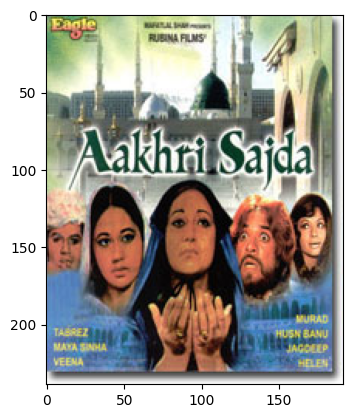

In [44]:
process_directory(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_001')

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]  


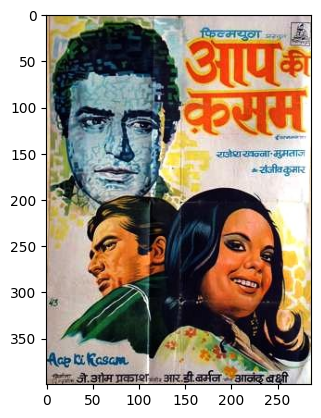

In [45]:
process_directory(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_002')

<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]   


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]   


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]   


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6
7 face_image 7


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3
4 face_image 4
5 face_image 5
6 face_image 6


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...


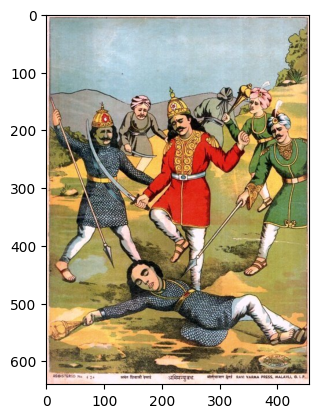

In [46]:
process_directory(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_003')

<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]  


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]  


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]  


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]   


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]   


Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]   


<class 'PIL.Image.Image'>
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]   


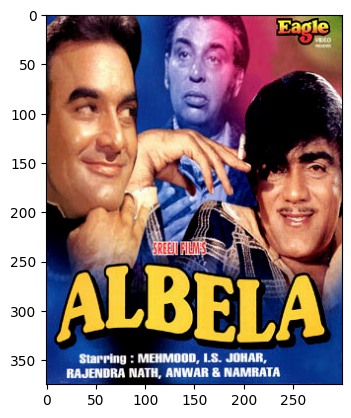

In [51]:
process_directory(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_004')

In [47]:
df=pd.DataFrame(super_result,columns=heading)

In [52]:
len(super_result)

494

In [49]:
df

,Image,Dominant Emotion,Gender,Age,Race
0,36 Chowringhee Lane_img_0.jpg,sad,Woman,33,black
1,36 Ghante_img_0.jpg,neutral,Woman,25,middle eastern
2,36 Ghante_img_0.jpg,fear,Woman,39,middle eastern
3,36 Ghante_img_0.jpg,fear,Woman,32,indian
4,36 Ghante_img_0.jpg,angry,Woman,31,indian
...,...,...,...,...,...
462,Abhimanyu_img_77.jpg,happy,Man,25,white
463,Abhimanyu_img_77.jpg,disgust,Man,34,black
464,Abhimanyu_img_77.jpg,angry,Man,27,white
465,Abhimanyu_img_77.jpg,sad,Man,24,middle eastern


In [53]:
df['Race'].unique()

array(['black', 'middle eastern', 'indian', 'white', 'latino hispanic',
       'asian'], dtype=object)

'middle eastern' and 'latino hispanic' are races similar to Indian, and they may not be useful in our analysis. Hence, we replace them with 'indian'

In [56]:
for i in range(len(df['Race'])):
    if df['Race'][i] in['middle eastern','latino hispanic']:
        df['Race'][i]='indian'
df['Race'].unique()

array(['black', 'indian', 'white', 'asian'], dtype=object)

In [50]:
df['Gender'].unique()

array(['Woman', 'Man'], dtype=object)

In [22]:
type(super_result)

list

In [23]:
for i in range(5):
    print(super_result[i])

['36 Chowringhee Lane_img_0.jpg', 'sad', {'Woman': 5.967970564961433, 'Man': 94.03203129768372}, 33, 'black']
['36 Ghante_img_0.jpg', 'neutral', {'Woman': 0.0507057411596179, 'Man': 99.9492883682251}, 25, 'middle eastern']
['36 Ghante_img_0.jpg', 'fear', {'Woman': 1.9089274108409882, 'Man': 98.09107184410095}, 39, 'middle eastern']
['36 Ghante_img_0.jpg', 'fear', {'Woman': 0.608200253918767, 'Man': 99.39179420471191}, 32, 'indian']
['36 Ghante_img_0.jpg', 'angry', {'Woman': 0.17036304343491793, 'Man': 99.82964396476746}, 31, 'indian']


### Sample Execution

In [9]:
img=cv2.imread(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_001\Aadat Se Majboor_img_1.jpg')

In [8]:
img

array([[[197, 240, 249],
        [197, 240, 249],
        [196, 239, 248],
        ...,
        [185, 233, 239],
        [203, 240, 244],
        [224, 245, 247]],

       [[190, 231, 240],
        [188, 231, 240],
        [189, 232, 241],
        ...,
        [184, 232, 238],
        [206, 243, 247],
        [230, 251, 253]],

       [[188, 227, 236],
        [187, 228, 237],
        [188, 228, 240],
        ...,
        [178, 226, 232],
        [206, 243, 247],
        [233, 254, 255]],

       ...,

       [[173, 229, 248],
        [173, 229, 248],
        [173, 229, 248],
        ...,
        [130, 187, 208],
        [123, 179, 198],
        [173, 223, 243]],

       [[173, 229, 248],
        [173, 229, 248],
        [173, 229, 248],
        ...,
        [131, 187, 206],
        [145, 199, 216],
        [199, 247, 255]],

       [[173, 229, 248],
        [173, 229, 248],
        [173, 229, 248],
        ...,
        [140, 194, 211],
        [160, 212, 228],
        [206, 252, 255]]

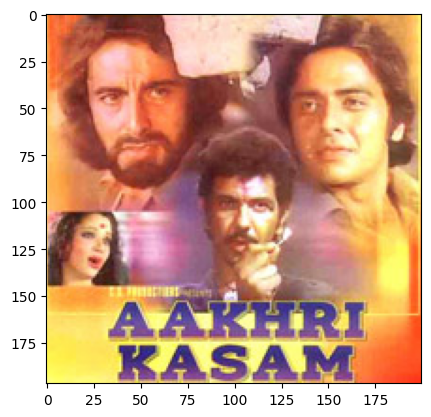

In [10]:
faces, img = detect_faces(r'C:\Users\shree\Desktop\docu3c\Bollywood\Bollywood-Data-master\images-data\dir_001\Aakhri Kasam_img_2.jpg')

In [18]:
len(faces)
len(img)

400

In [11]:
analyze_faces(faces, img)

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


In [12]:
result=detect()

Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 face_image 1
2 face_image 2
3 face_image 3


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]  


In [13]:
result

[[{'emotion': {'angry': 0.5102336729784401,
    'disgust': 0.0009239704730983632,
    'fear': 2.61096550691539,
    'happy': 4.474124501546206e-05,
    'sad': 96.74604573893002,
    'surprise': 0.0004539454862428622,
    'neutral': 0.13132839993570447},
   'dominant_emotion': 'sad',
   'region': {'x': 20,
    'y': 17,
    'w': 210,
    'h': 210,
    'left_eye': (58, 88),
    'right_eye': (142, 79)},
   'face_confidence': 0.94,
   'gender': {'Woman': 1.2952273711562157, 'Man': 98.70477318763733},
   'dominant_gender': 'Man',
   'age': 22,
   'race': {'asian': 0.0012025151590933092,
    'indian': 0.0027674008379108272,
    'black': 2.3907708168735553e-05,
    'white': 97.66870737075806,
    'middle eastern': 1.506643183529377,
    'latino hispanic': 0.8206578902900219},
   'dominant_race': 'white'}],
 [{'emotion': {'angry': 11.286494135856628,
    'disgust': 0.013056857278570533,
    'fear': 0.7192299701273441,
    'happy': 9.273756295442581,
    'sad': 6.155765056610107,
    'surprise':

In [16]:
print(len(result))
print(type(result))
for i in result:
    print(i)

3
<class 'list'>
[{'emotion': {'angry': 0.5102336729784401, 'disgust': 0.0009239704730983632, 'fear': 2.61096550691539, 'happy': 4.474124501546206e-05, 'sad': 96.74604573893002, 'surprise': 0.0004539454862428622, 'neutral': 0.13132839993570447}, 'dominant_emotion': 'sad', 'region': {'x': 20, 'y': 17, 'w': 210, 'h': 210, 'left_eye': (58, 88), 'right_eye': (142, 79)}, 'face_confidence': 0.94, 'gender': {'Woman': 1.2952273711562157, 'Man': 98.70477318763733}, 'dominant_gender': 'Man', 'age': 22, 'race': {'asian': 0.0012025151590933092, 'indian': 0.0027674008379108272, 'black': 2.3907708168735553e-05, 'white': 97.66870737075806, 'middle eastern': 1.506643183529377, 'latino hispanic': 0.8206578902900219}, 'dominant_race': 'white'}]
[{'emotion': {'angry': 11.286494135856628, 'disgust': 0.013056857278570533, 'fear': 0.7192299701273441, 'happy': 9.273756295442581, 'sad': 6.155765056610107, 'surprise': 0.15824363799765706, 'neutral': 72.3934531211853}, 'dominant_emotion': 'neutral', 'region': {

## Convert to CSV

In [61]:
os.chdir(r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis')
df.to_csv('image_analysis.csv', index=False)

In [ ]:
# def verification(img1, img2, model_name='VGG-Face', distance_metric='cosine'):
#     start=time.time()
#     result1 = DeepFace.verify(img1, img2, model_name=model_name, distance_metric=distance_metric)
#     result2 = DeepFace.verify(img1, img2, model_name=model_name, distance_metric=distance_metric)
#     print(result1)
#     demography1=DeepFace.analyze(img1,['name','gender','emotion'])
#     print(demography1)
#     end=time.time()
#     print("Time: ",end-start)
#     print(result2)
#     demography2=DeepFace.analyze(img2,['name','gender','emotion'])
#     print(demography2)
#     end=time.time()
#     print("Time: ",end-start)

In [ ]:
# input_directory = r""
# output_directory = r""

# convert_svg_to_png(input_directory, output_directory)

In [ ]:
# def convert_svg_to_png(input_dir, output_dir):
#     for filename in os.listdir(input_dir):
#         if filename.lower().endswith(".svg"):
#             input_path = os.path.join(input_dir, filename)
#             output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.png")
#             cairosvg.svg2png(url=input_path, write_to=output_path)

In [ ]:
# def test():
#     model_path = r'C:\Users\shree\Desktop\docu3c\Bollywood\images-analysis\ESRGAN\models\RRDB_ESRGAN_x4.pth'  # models/RRDB_ESRGAN_x4.pth OR models/RRDB_PSNR_x4.pth
#     device = torch.device('cuda')  # if you want to run on CPU, change 'cuda' -> cpu
#     # device = torch.device('cpu')

#     test_img_folder = 'LR/*'

#     model = arch.RRDBNet(3, 3, 64, 23, gc=32)
#     model.load_state_dict(torch.load(model_path), strict=True)
#     model.eval()
#     model = model.to(device)

#     print('Model path {:s}. \nTesting...'.format(model_path))

#     idx = 0
#     for path in glob.glob(test_img_folder):
#         idx += 1
#         base = osp.splitext(osp.basename(path))[0]
#         print(idx, base)
#         # read images
#         img = cv2.imread(path, cv2.IMREAD_COLOR)
#         img = img * 1.0 / 255
#         img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
#         img_LR = img.unsqueeze(0)
#         img_LR = img_LR.to(device)

#         with torch.no_grad():
#             output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()
#         output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
#         output = (output * 255.0).round()
#         cv2.imwrite('C:/Users/shree/Desktop/docu3c/Bollywood/images-analysis/results/{:s}.png'.format(base), output)